In [2]:
import cv2
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from keras.models import load_model
from PTIT_model import build_ptit

labels = ['background','road','traffic','car']
lr_init = 1e-4
lr_decay = 5e-4
model = build_ptit((256, 320, 3), num_classes=len(labels),
                lr_init=lr_init, lr_decay=lr_decay)
model.load_weights('/home/vicker/Downloads/pitmodel-007-0.37500.hdf5')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [3]:
def show_img(img):
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    plt.show

In [7]:
def result_map_to_img(res_map):
    img = np.zeros((256, 320, 3), dtype=np.uint8)
    res_map = np.squeeze(res_map)

    argmax_idx = np.argmax(res_map, axis=2)

    # For np.where calculation.
    road = (argmax_idx == 1)
    car = (argmax_idx == 2)
    traffic = (argmax_idx == 3)

    img[:, :, 0] = np.where(road, 255, 0)
    img[:, :, 1] = np.where(car, 255, 0)
    img[:, :, 2] = np.where(traffic, 255, 0)

    return img

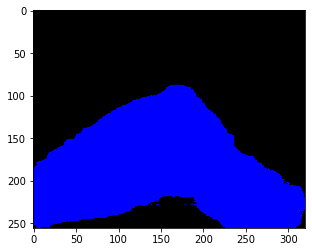

In [22]:

img = cv2.imread('/home/vicker/Documents/new_solution_self_driving/data/simulator_2/debug/0a2fa898-f8bb-4373-bd1d-a45139863977.jpg')
start_time = time.time()
img = cv2.resize(img,(320,256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, 0)
img = img / 127.5 - 1
pred = model.predict(img)
res_img = result_map_to_img(pred[0])
show_img(res_img)